# Simple Linear Regression
una regresion lineal simple sobre un dataset de Diamantes. Veremos si existe una relacion entre varaibles descriptivas y su peso.
* **Name Dataset:** Diamonds
* **URL:** https://www.kaggle.com/shivam2503/diamonds

In [84]:
import pandas as pd #lib dataset management
import numpy as np #number lib
import matplotlib.pyplot as plt#plots and graphics

In [85]:
data = pd.read_csv("../datasets/diamonds.csv")

In [86]:
data.head()

,indice,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Cleaning

In [87]:
data.shape#53940 rows, 11 columns

(53940, 11)

In [88]:
data.describe() #basic statistics

,indice,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [89]:
data.dtypes

indice       int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

No hay problemas con el tipo de dato. **No es necesario realizar conversiones**

### Valores vacios
Revisaremos si existen valores vacios y veremos si es necesario tratar esos campos

In [90]:
pd.isnull(data["x"]) #False= No es nulo; True= Si es nulo

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: x, Length: 53940, dtype: bool

In [91]:
pd.isnull(data["x"]).values #retorna array
pd.isnull(data["x"]).values.ravel().sum() #deveuvle suma de 1's (true), datos vacios

0

Tengo 0 datos vacios. Solo son campos con 0's. Para esta ocasion dejaremos los datos asi
* **No se requieren variables Dummy**

## Graficos
Crearemos graficos para ver las relaciones entre las variables de manera grafica y conocer de que forma se comportan

In [92]:
%matplotlib inline

### Scatter Plot
grafico de puntos

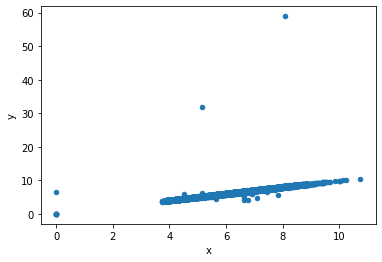

In [93]:
data.plot(kind="scatter", x="x", y="y")#pinto grafico

Veremos algunas relaciones posibles. La anterior es lineal sin embargo se pueden apreciar otras muy interesantes en este dataset

### Matriz de graficos
Veremos varias relaciones a continuacion

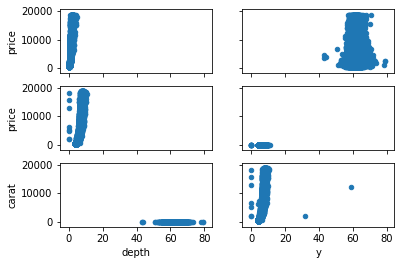

In [94]:
figure, axs = plt.subplots(3,2, sharey=True, sharex=True)
# aqui debajo vamos a colocar uno por uno los datos que queremos graficar (hacerlo aqui es obligatorio para que se vean en ese grafico 2*2)
data.plot(kind="scatter", x="carat", y="price", ax=axs[0][0])
data.plot(kind="scatter", x="depth", y="price", ax=axs[0][1])
#-- 
data.plot(kind="scatter", x="x", y="price", ax=axs[1][0])
data.plot(kind="scatter", x="x", y="y", ax=axs[1][1])

data.plot(kind="scatter", x="depth", y="carat", ax=axs[2][0])
data.plot(kind="scatter", x="y", y="price", ax=axs[2][1])

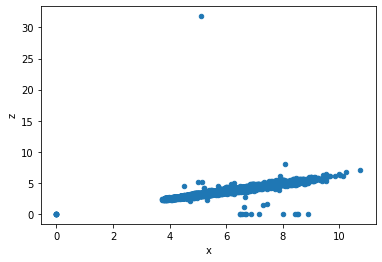

In [95]:
data.plot(kind="scatter", x="x", y="z")

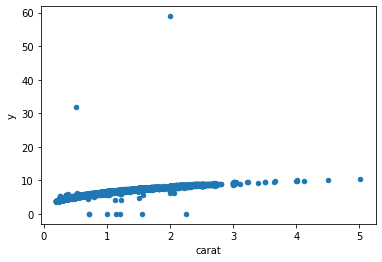

In [96]:
data.plot(kind="scatter", x="carat", y="y")

### Histograma de frecuencia
Es una buena forma de ver como se distribuye una variable

Text(0.5, 1.0, 'Histograma largo vs ancho')

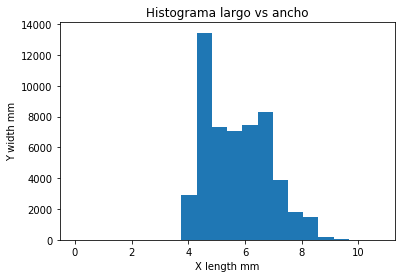

In [97]:
plt.hist(data["x"], bins=20)#puedo decir en cuantos pedacitos quiero que se parta el grafico
#a continuacion ponemos lables al grafico
plt.xlabel("X length mm")
plt.ylabel("Y width mm")
plt.title("Histograma largo vs ancho")

La [regla de Struges](https://es.wikipedia.org/wiki/Regla_de_Sturges) te indica cuantas divisiones se deben elaborar en un histograma **vamos a usarla a continuacion**

Text(0.5, 1.0, 'Histograma largo vs ancho')

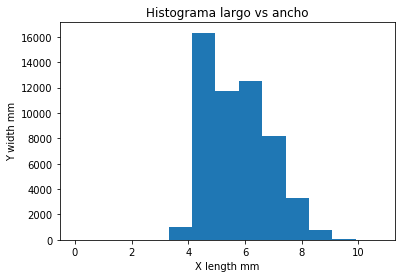

In [98]:
k = int(np.ceil(1+np.log2(3333))) #aplico la regla de Struges, convierto a entero y redondeo. Resutlado= 13
plt.hist(data["x"], bins=k)
#a continuacion ponemos lables al grafico
plt.xlabel("X length mm")
plt.ylabel("Y width mm")
plt.title("Histograma largo vs ancho")

## **Primeras conclusiones**
* Hay una relacion directa entre largo y ancho del diamante _(si, se que parece algo muy obvio)_ pero en realidad significa que todos los diamantes son cortados de maenra casi uniforme siguiendo el mismo parametro de tamaño. Es como las popCorn de KFC, no hay una muy larga y delgada. Todas son redonditas y mas o menos uniformes

* La misma relacion directa de caracter lineal se da entre X y Z
* Entre peso y "Y" tambien se da esa relacion aunque presenta una leve curva (no es 100% lineal)

## Data wrangling - La cirugía de los datos

Solo realizaremos un set de datos sobre el cual operar eliminando columnas que no necesitamos para la regresion lineal

In [99]:
data_set = data[["carat","depth","table","price","x","y","z"]]
data_set.head()#elimine 4 columnas

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


## Estadisticas y correlacion

Determinaremos la correlacion entre las variables en las que estamos interesados

Solicitamos la correlacion de las diferetnes variables de manera automatica gracias al poder de pandas

In [100]:
data_set.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Pintamos la matriz de correlacion

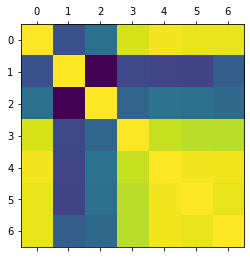

In [101]:
plt.matshow(data_set.corr())

Receurda que las mas brillantes son las mas correlacionadas
* Como "carat" (peso) - con X,Y,Z (variables de tamaño)
* **Carat** Tiene una relacion (no lineal pero si interesante) con el precio
    * al igual que las variables relacionadas con medidas de tamaño

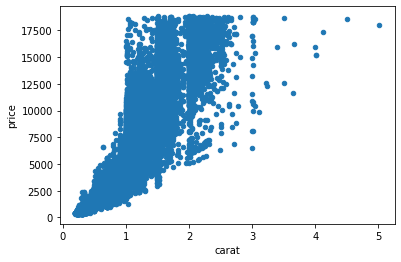

In [102]:
data.plot(kind="scatter", x="carat", y="price")

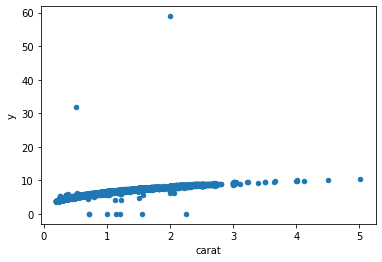

In [103]:
data.plot(kind="scatter", x="carat", y="y")

## Regresion lineal Simple
A lo que vinimos!

### Paquete statsmodel
El proceso es un poco mas manual pero resulta en que tenemos mejor control 

In [104]:
import statsmodels.formula.api as smf

In [105]:
lm = smf.ols(formula="x~y", data = data_set).fit() #defino los parametros para la regresion
#en este caso seran x= altura y= ancho

In [106]:
lm #objeto linnear regreesion

In [107]:
lm.params #parametros del modelo lineal

Intercept    0.241413
y            0.957314
dtype: float64

In [108]:
lm.summary() #valores relacionados con la regresion lineal

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.026e+06
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:37:41   Log-Likelihood:                -1916.6
No. Observations:               53940   AIC:                             3837.
Df Residuals:                   53938   BIC:                             3855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2414      0.006     43.680      0.000       0.231       0.252
y              0.9573      0.001   1012.793      0.000       0.955       0.959
==============================================================================
Omnibus:                   244690.794   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1767166921686.735
Skew:                        -154.327   Prob(JB):                         0.00
Kurtosis:                   28042.007   Cond. No.                         30.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo lineal predictivo se ve asi:

 _entendiendo Intercept como alpha = a; y a TV como beta = b_
 
**x = 0.241413 + 0.957314* y(width)**

* Ya realizamos el modelo ahora intentemos usarlo para predecir

In [109]:
x_pred = lm.predict(pd.DataFrame(data_set["y"]))
x_pred

0        4.051524
1        3.917500
2        4.137683
3        4.290853
4        4.405731
           ...   
53935    5.755544
53936    5.745971
53937    5.678959
53938    6.100177
53939    5.860848
Length: 53940, dtype: float64

Vamos a graficar

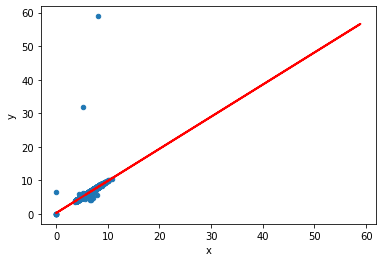

In [110]:
data.plot(kind= "scatter", x="x", y="y")
plt.plot(pd.DataFrame(data_set["y"]), x_pred, c="r", linewidth=2)

* Azules son datos originales
* En rojo modelo de regresion

#### Agregando la formula de regresion al dataset

In [111]:
data_set["x_pred"] = 0.241413 + 0.957314* data_set["y"]
#modelo, tomando los valores generados por fit. Lo agregamos como columna al dataset

C:\Users\luisb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Calculando el error
Veamos cuantos datos del modelo no quedan explicados

In [112]:
data_set["RSE"] = (data_set["x"]-data_set["x_pred"])**2 #el error

C:\Users\luisb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
SSD = sum(data_set["RSE"])
SSD

3390.7825598428512

In [114]:
RSE = np.sqrt(SSD/(len(data_set)-2))
RSE

0.25072783516295233

In [115]:
x_m = np.mean(data_set["x"])
x_m

5.731157211716609

In [116]:
error = RSE/x_m #error promedio
error #un 23% del modelo no queda explicado

0.043748204053863975

Segun este resultado solo un 4.3% de los datos quedan sin explicarse.
* **Este porcentaje parece demasiado bajo para ser real** _tengo miedo_

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.3937e+04]),
 array([-48.5372076 , -43.43452928, -38.33185095, -33.22917263,
        -28.1264943 , -23.02381598, -17.92113766, -12.81845933,
         -7.71578101,  -2.61310268,   2.48957564]),
 <a list of 10 Patch objects>)

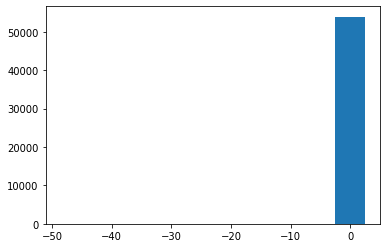

In [118]:
plt.hist((data_set["x"]-data_set["x_pred"]))

Datos distribuidos en una sola zona. El % de error es muy bajo, en teoria muy bueno. Quiza se pueda mejorar usando otros valores como z